In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 16582, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 16582 (delta 30), reused 39 (delta 18), pack-reused 16522
Receiving objects: 100% (16582/16582), 15.11 MiB | 15.87 MiB/s, done.
Resolving deltas: 100% (11383/11383), done.
/content/yolov5
HEAD is now at 064365d8 Update parse_opt() in export.py to work as in train.py (#10789)


In [ ]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.2.1+cu121 CPU


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yONKegsyLUtsvRd1G3rp")
project = rf.workspace("ujjawal-singh-h3qp1").project("adl_object_detection")
version = project.version(4)
dataset = version.download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ADL_object_detection--4 in yolov5pytorch:: 100%|██████████| 724/724 [00:00<00:00, 7203.41it/s]


In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content/yolov5


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
%cat {dataset.location}/data.yaml

names:
- bike
- car
- cycle
nc: 3
roboflow:
  license: CC BY 4.0
  project: adl_object_detection
  url: https://universe.roboflow.com/ujjawal-singh-h3qp1/adl_object_detection/dataset/4
  version: 4
  workspace: ujjawal-singh-h3qp1
test: ../test/images
train: ADL_object_detection--4/train/images
val: ADL_object_detection--4/valid/images


In [ ]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#this is the model configuration we will use for our tutorial
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%writetemplate /content/drive/MyDrive/ADL/custom__Yolo5.yaml

In [ ]:
%%time
%cd /content/yolov5/
!python train.py --img 356 --batch 15 --epochs 20 --data {dataset.location}/data.yaml --cfg  '' --name yolov5s_results  --cache

/content/yolov5
2024-05-07 16:34:55.100443: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 16:34:55.100506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 16:34:55.102109: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 16:34:56.506659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/ADL_object_detection--4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=15, imgsz=356, rect=False, resume=False, nosave=False, noval=False, noautoanch

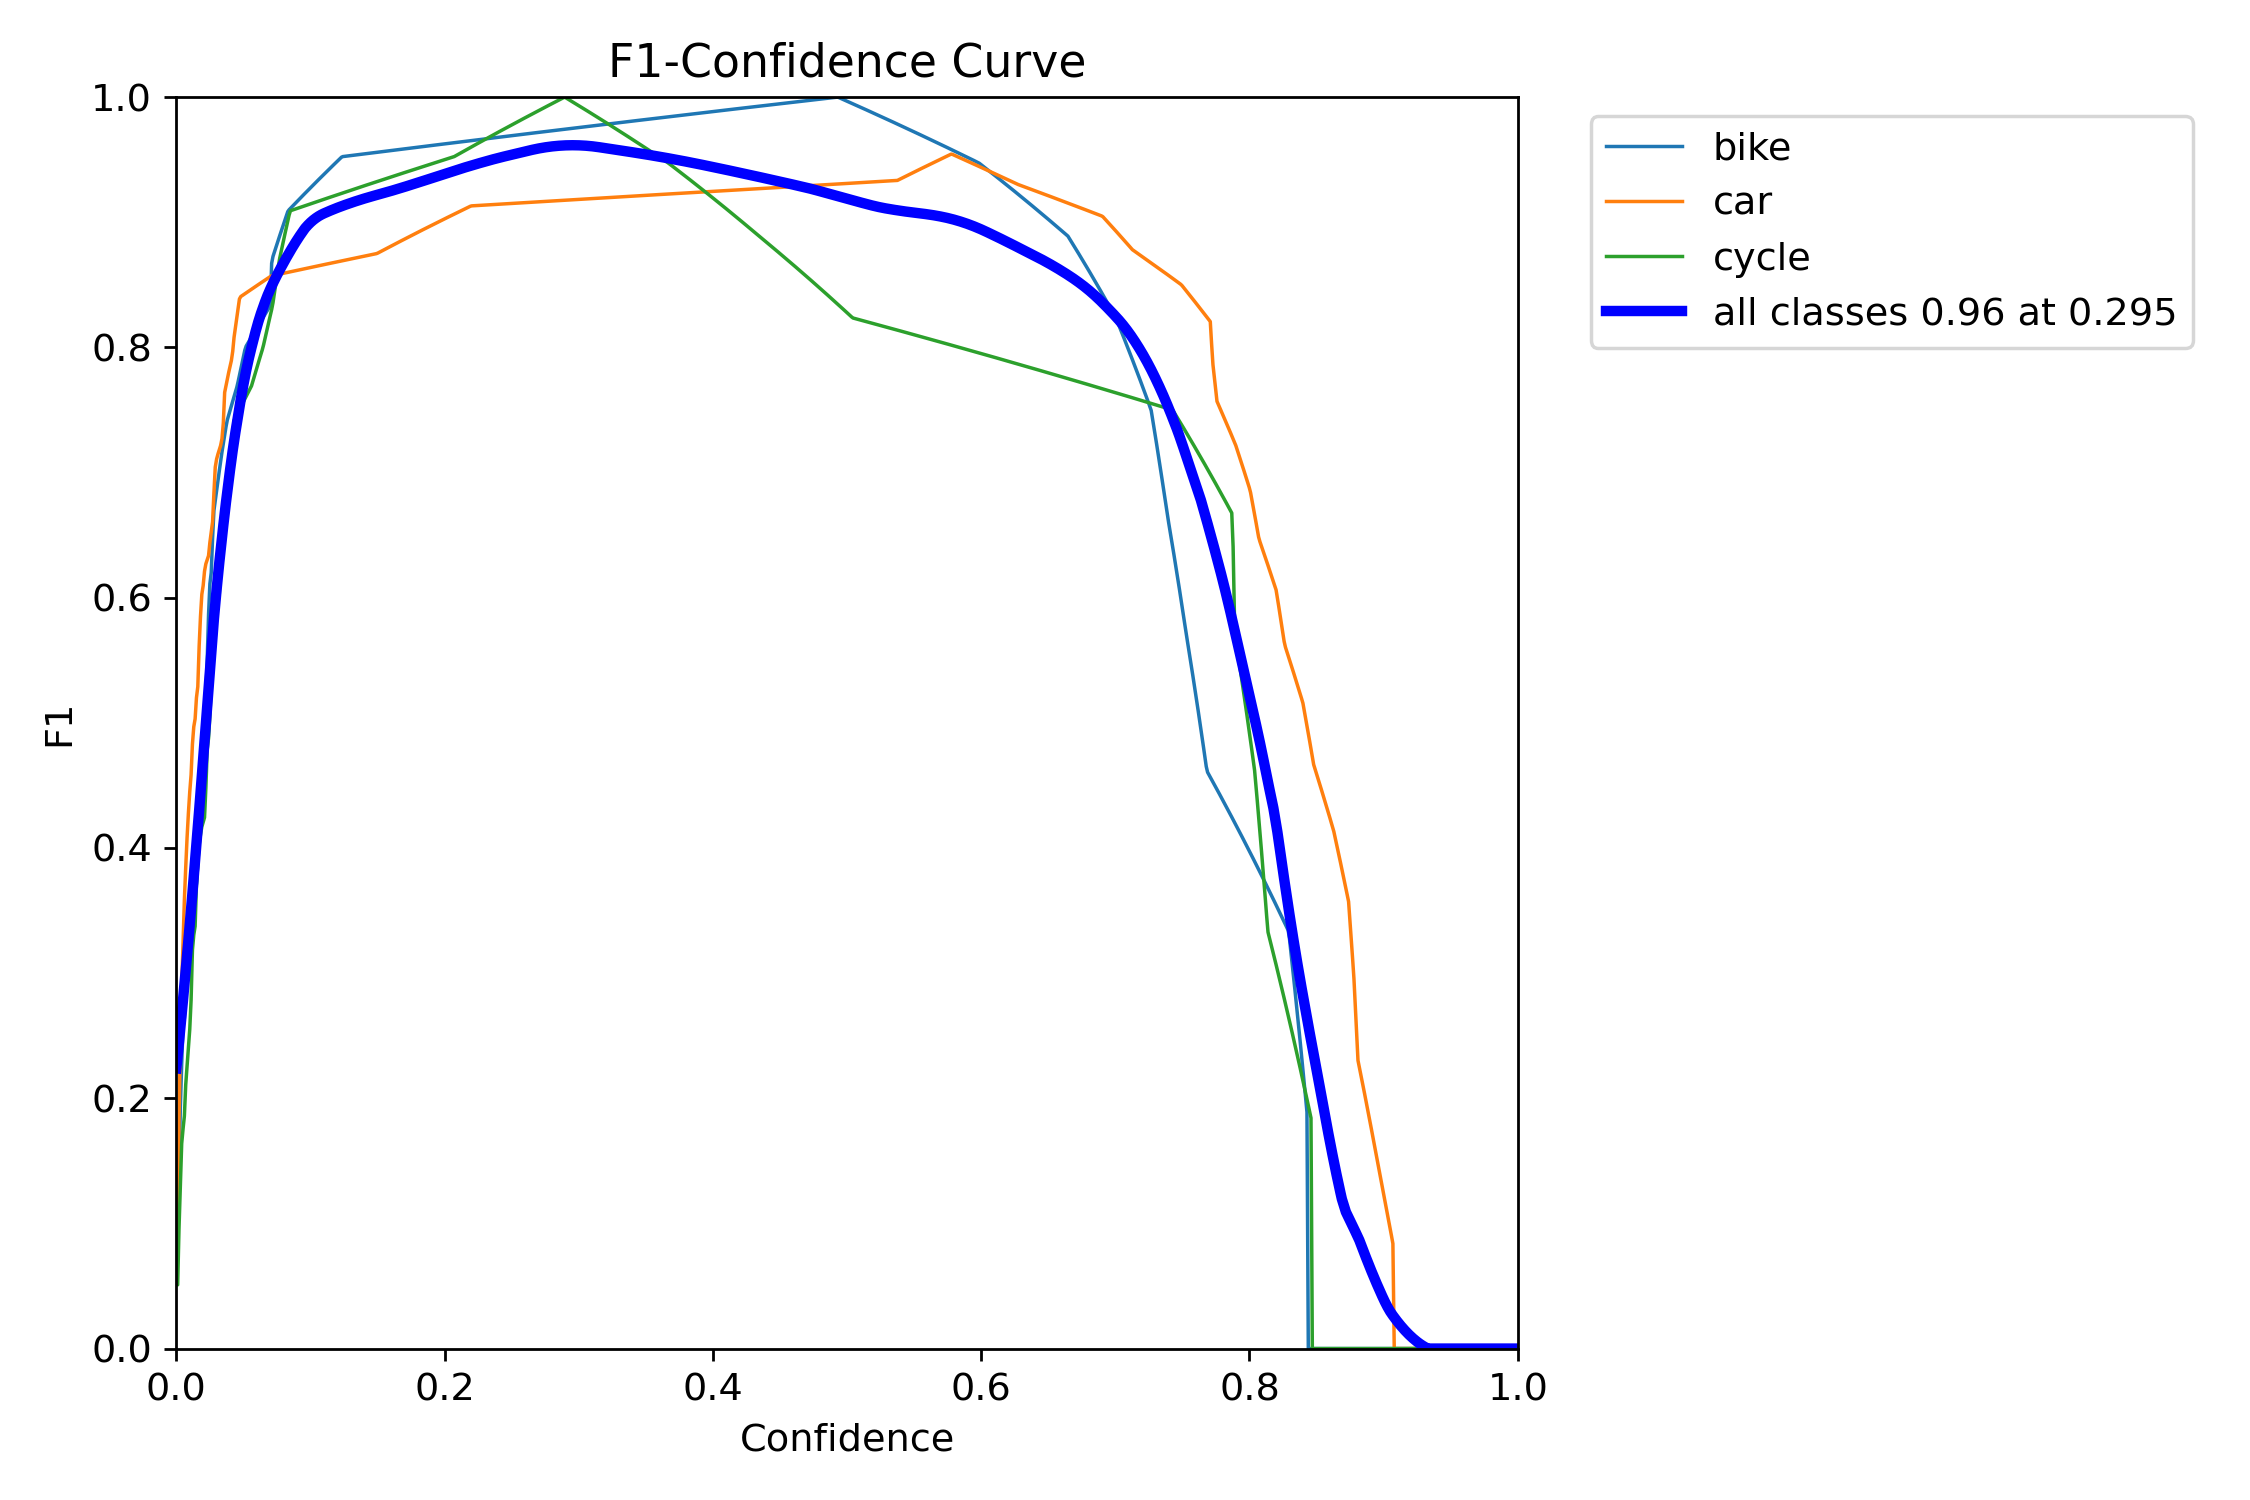

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/drive/MyDrive/yolov5/runs/train/yolov5s_results  --cache3/F1_curve.png', width=1000)  # view results.png

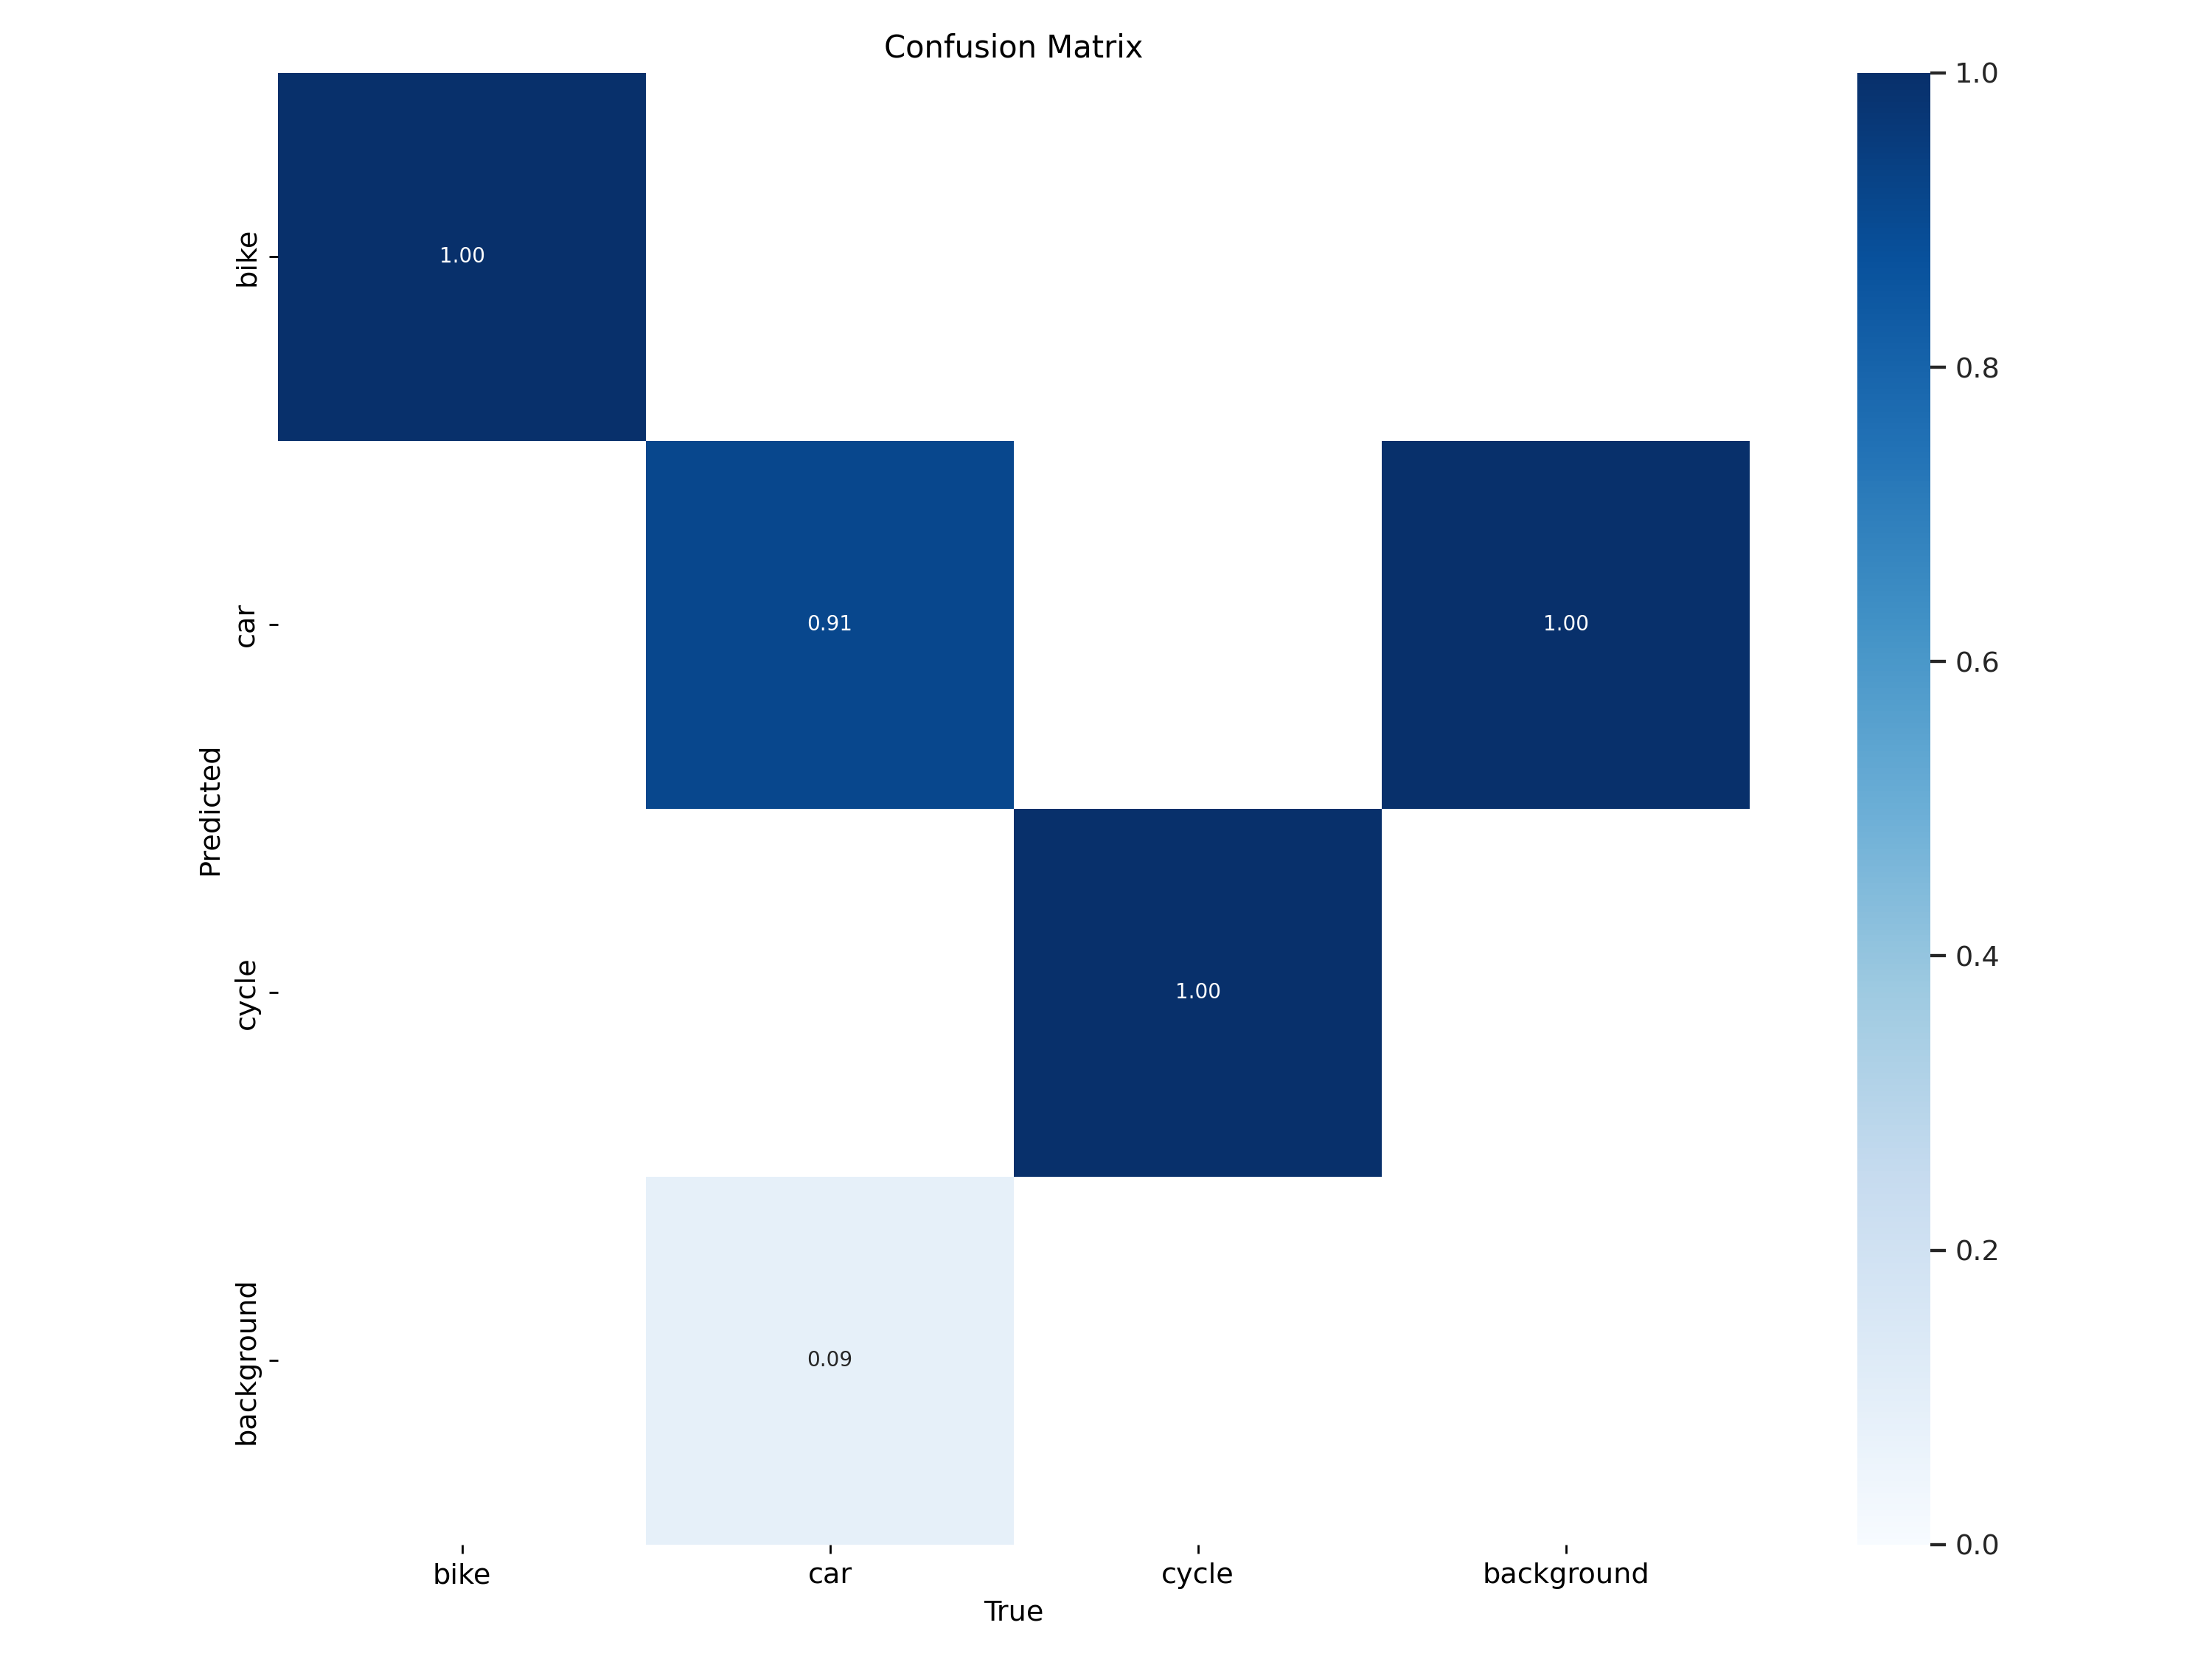

In [ ]:
Image(filename='/content/drive/MyDrive/yolov5/runs/train/yolov5s_results  --cache3/confusion_matrix.png', width=1000)  # view results.png

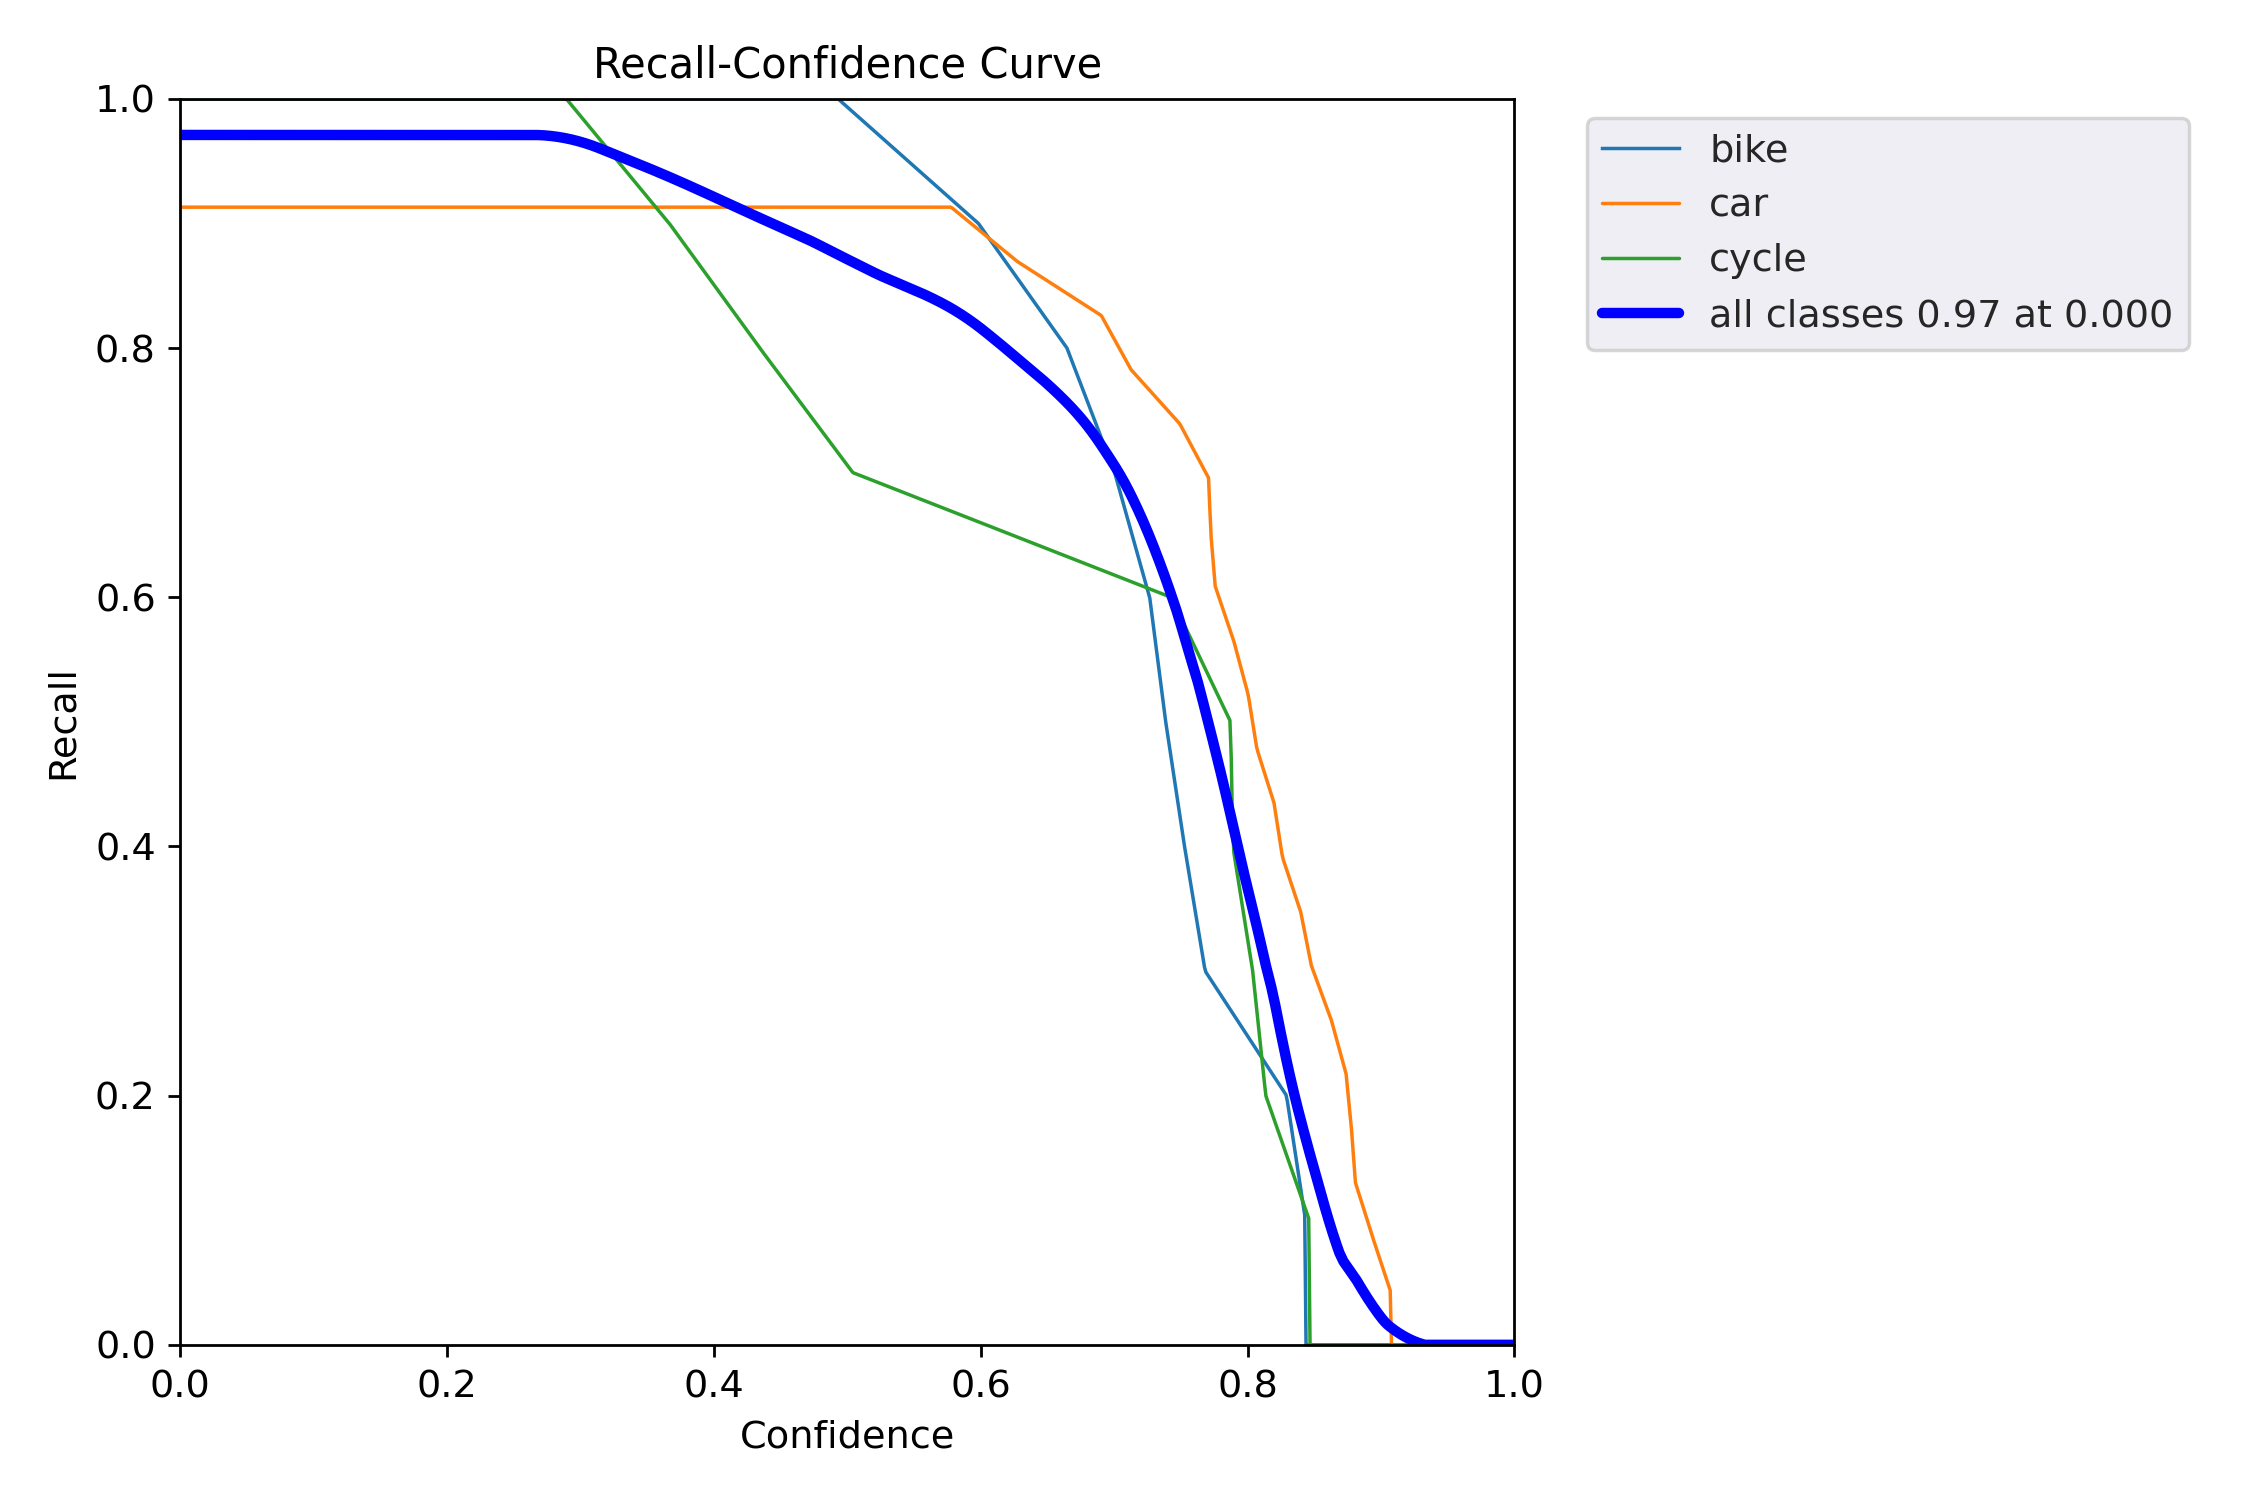

In [ ]:
Image(filename='/content/drive/MyDrive/yolov5/runs/train/yolov5s_results  --cache3/R_curve.png', width=1000)  # view results.png

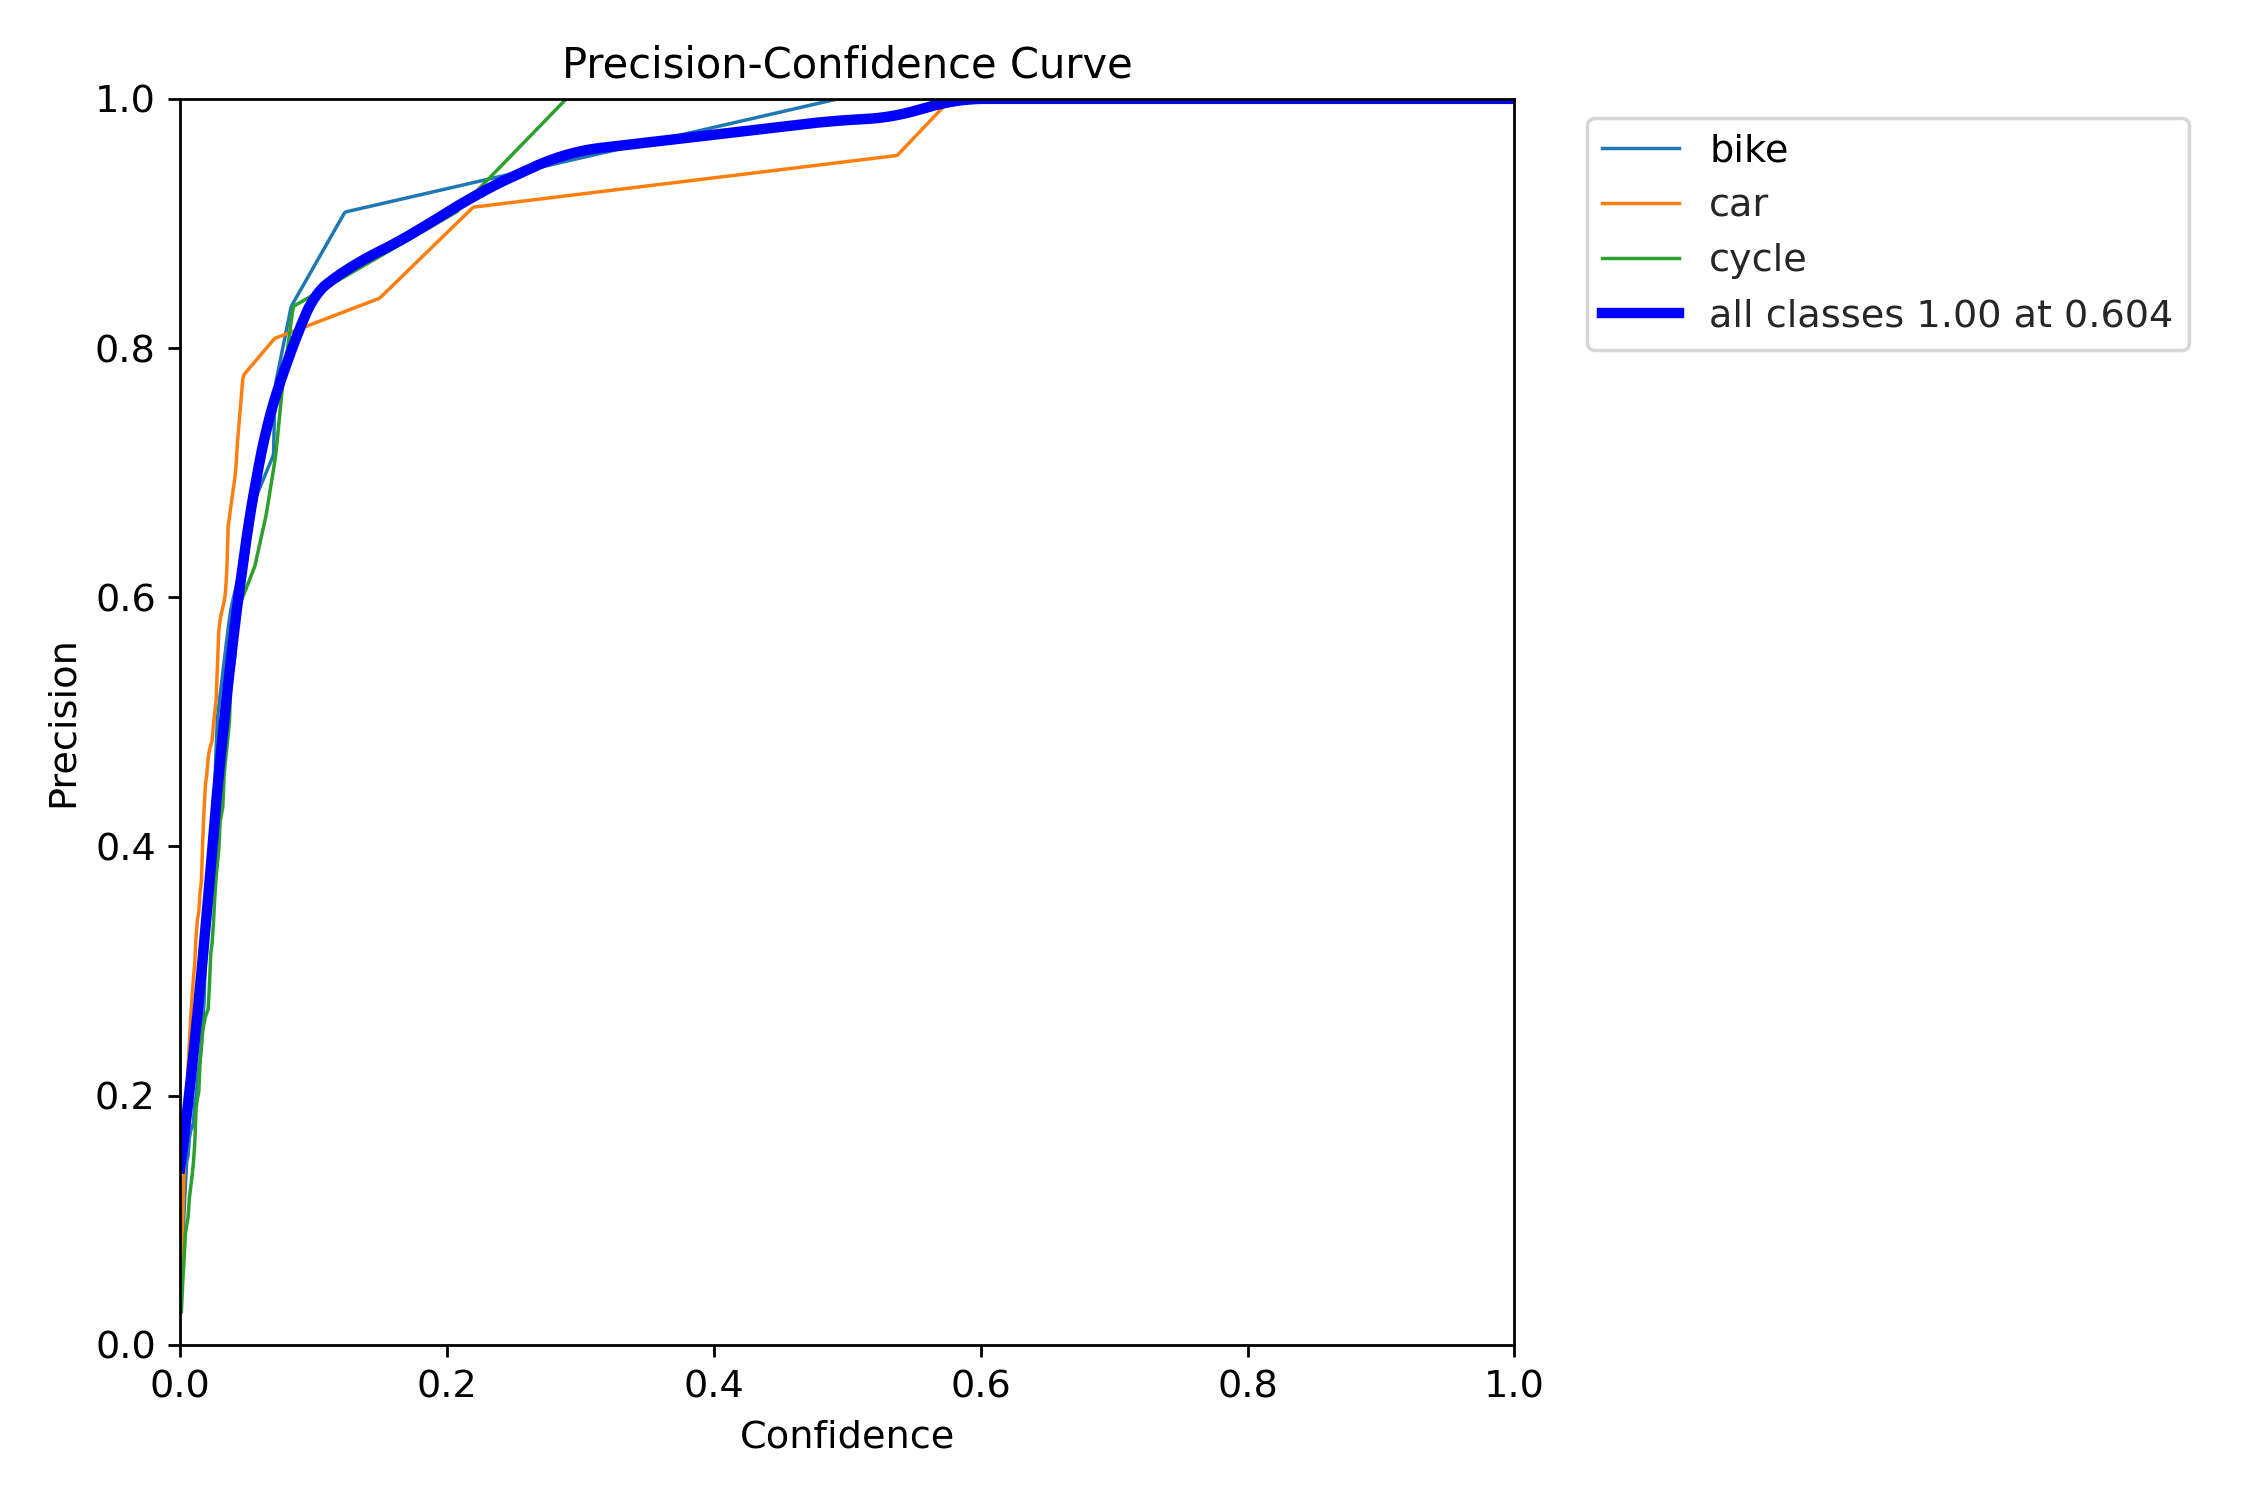

In [ ]:
Image(filename='/content/drive/MyDrive/yolov5/runs/train/yolov5s_results  --cache3/P_curve.png', width=1000)  # view results.png

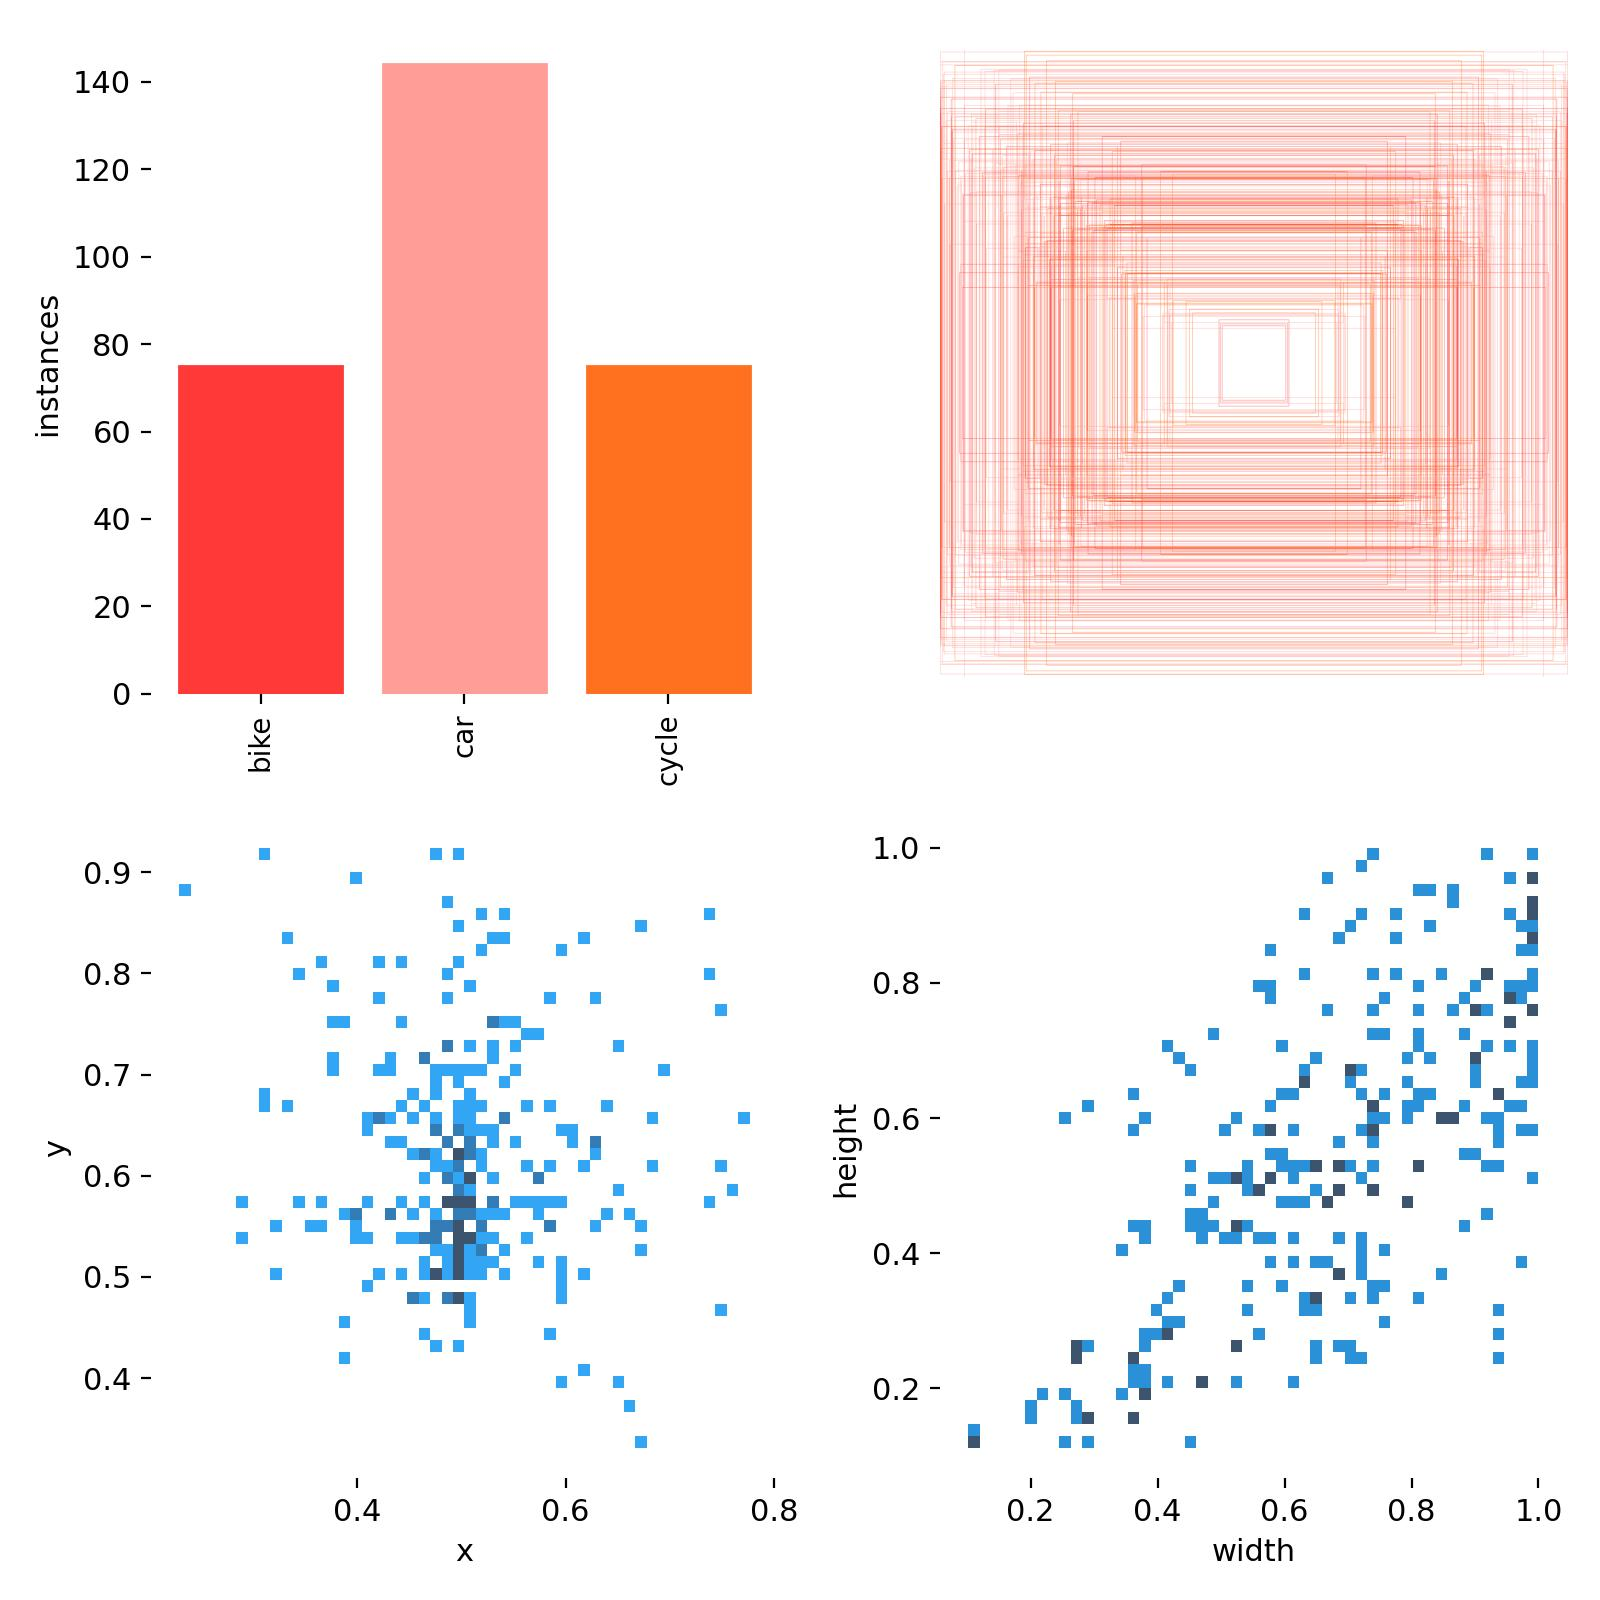

In [ ]:
Image(filename='/content/drive/MyDrive/yolov5/runs/train/yolov5s_results  --cache3/labels.jpg', width=1000)  # view results.png

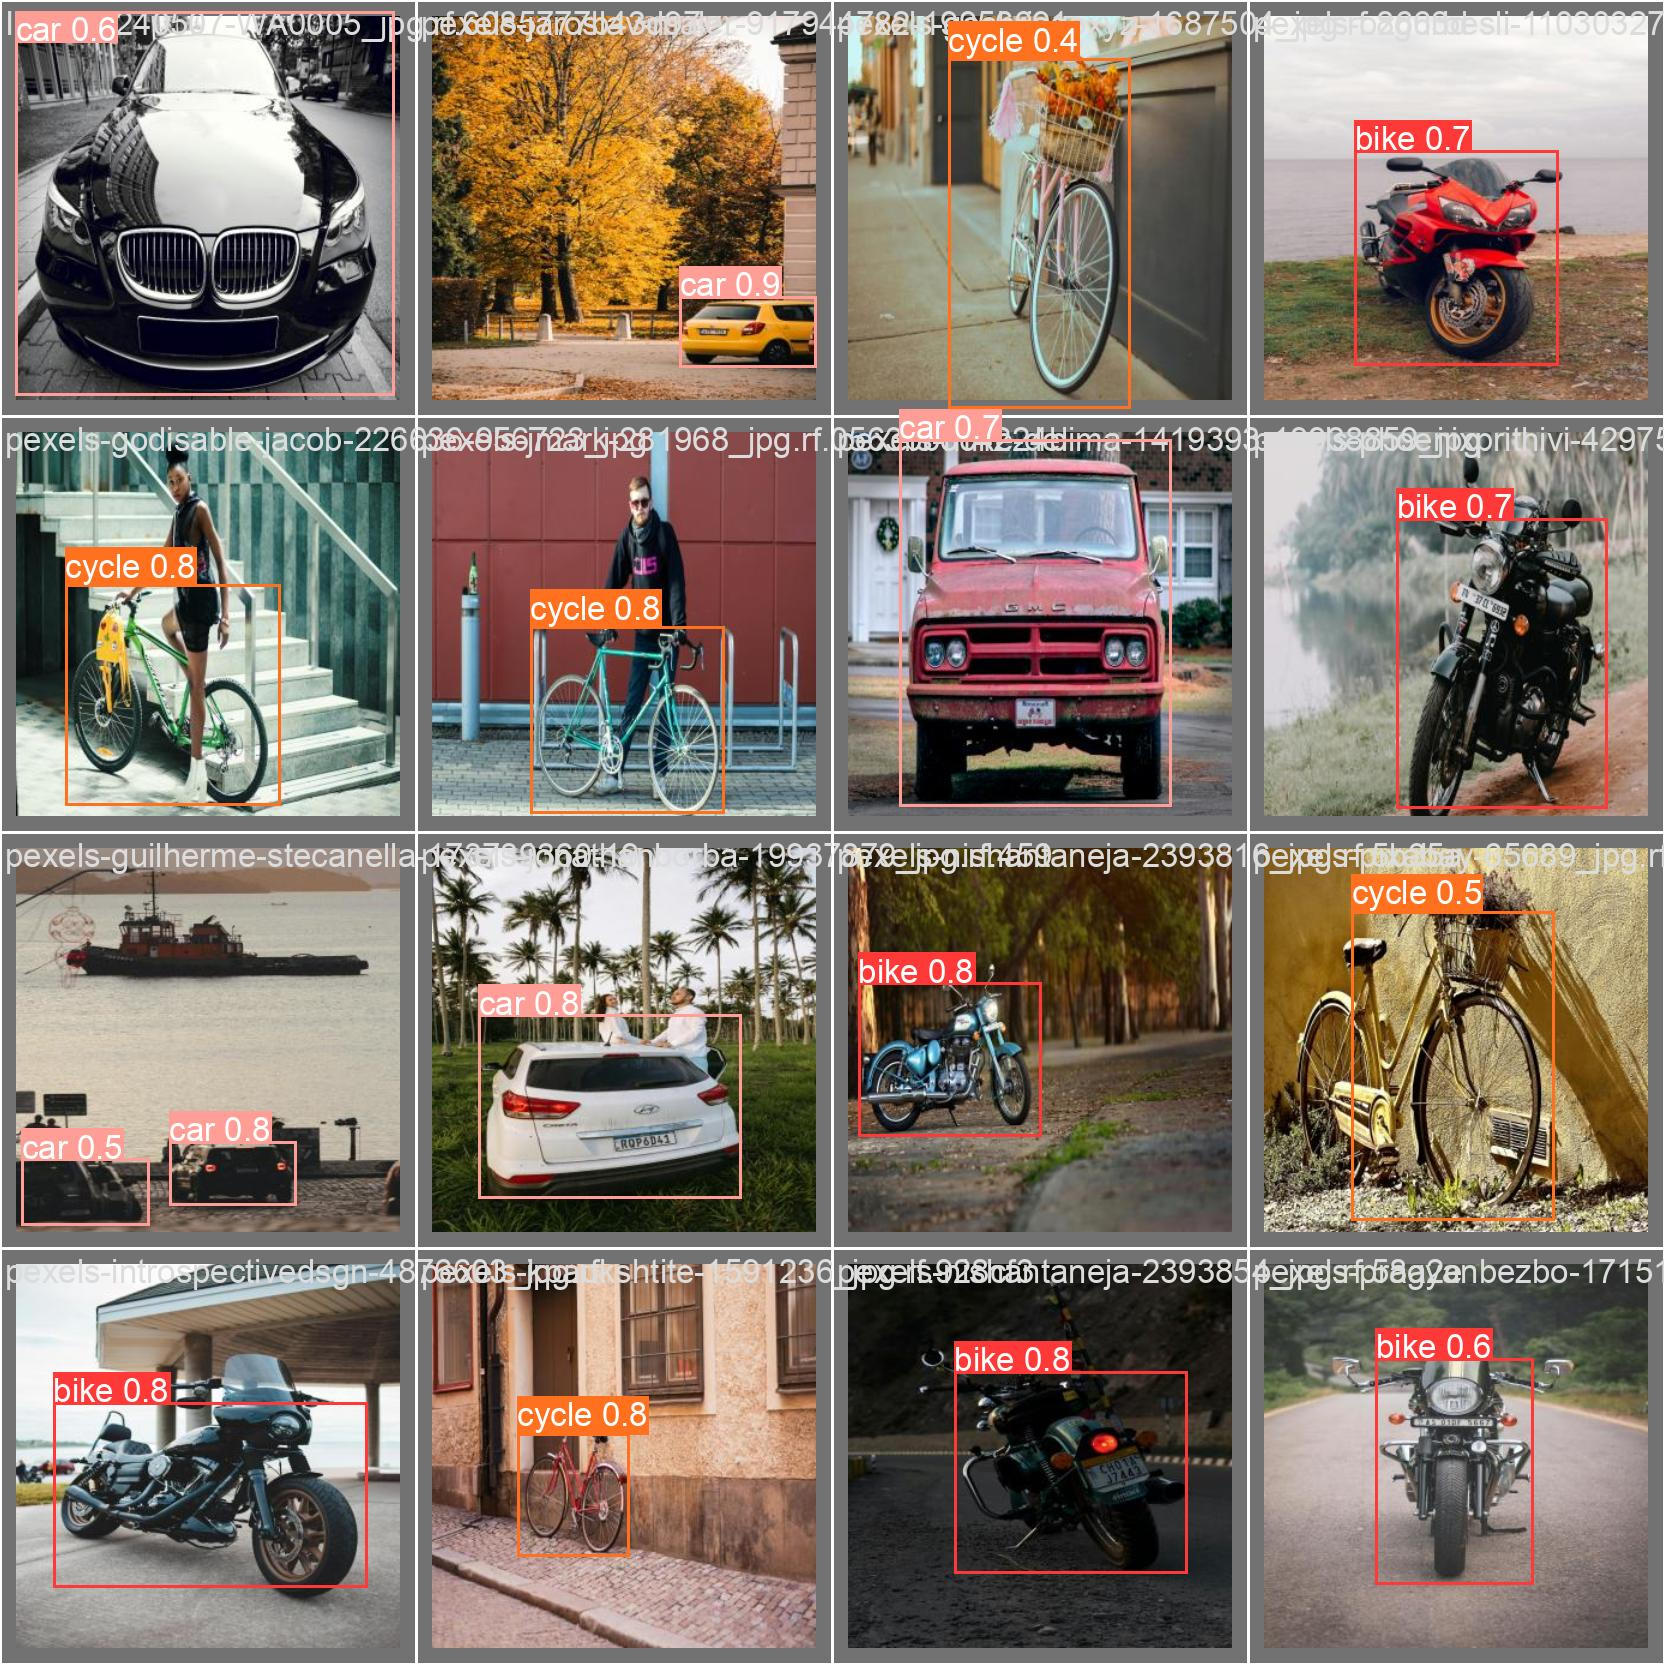

In [ ]:
Image(filename='/content/drive/MyDrive/yolov5/runs/train/yolov5s_results  --cache3/val_batch0_pred.jpg',width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


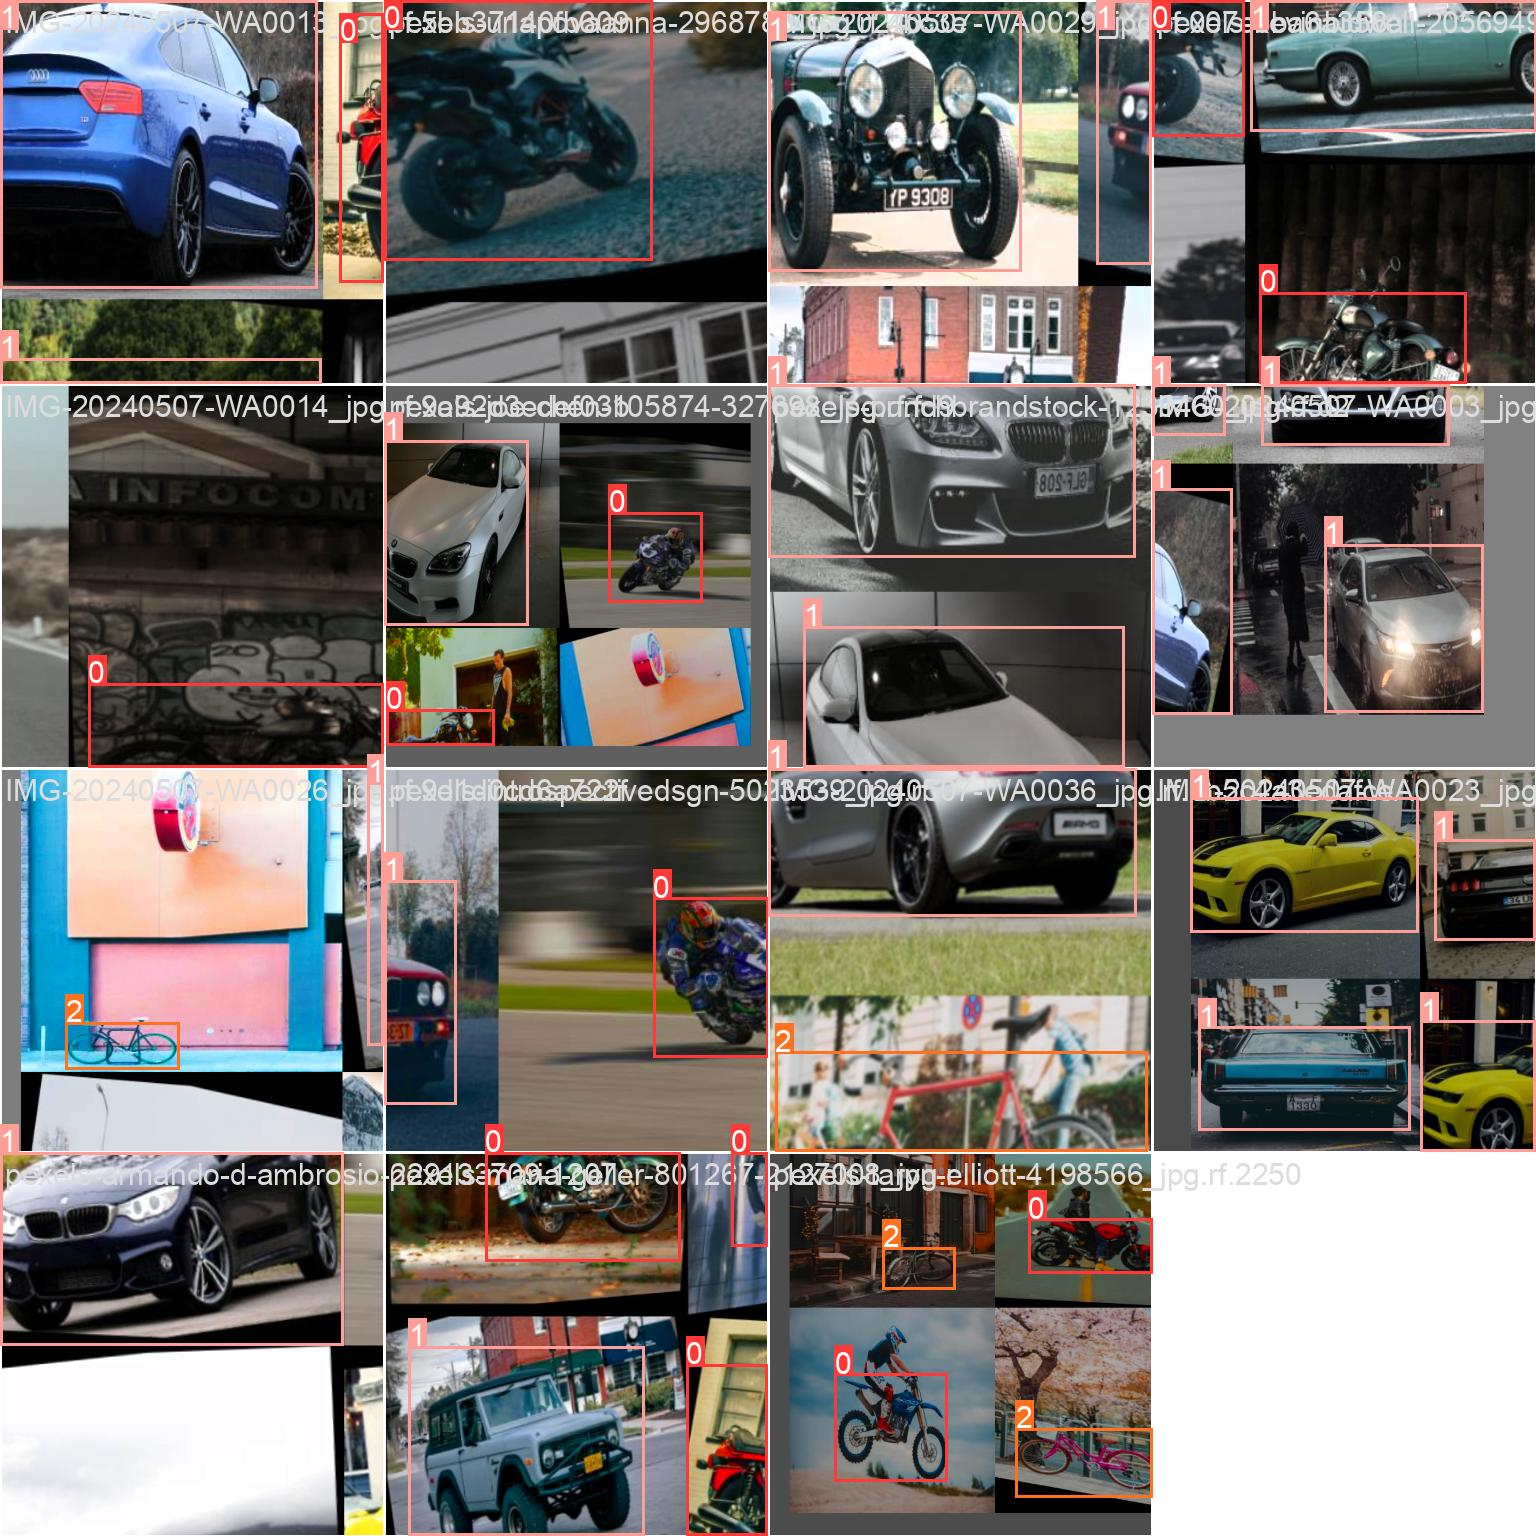

In [ ]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/drive/MyDrive/yolov5/runs/train/yolov5s_results  --cache3/train_batch0.jpg',width=900)

In [ ]:
%ls /content/drive/MyDrive/yolov5/runs/train

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
yolov5s_results/   yolov5s_results  --cache/   yolov5s_results  --cache3/
yolov5s_results2/  yolov5s_results  --cache2/


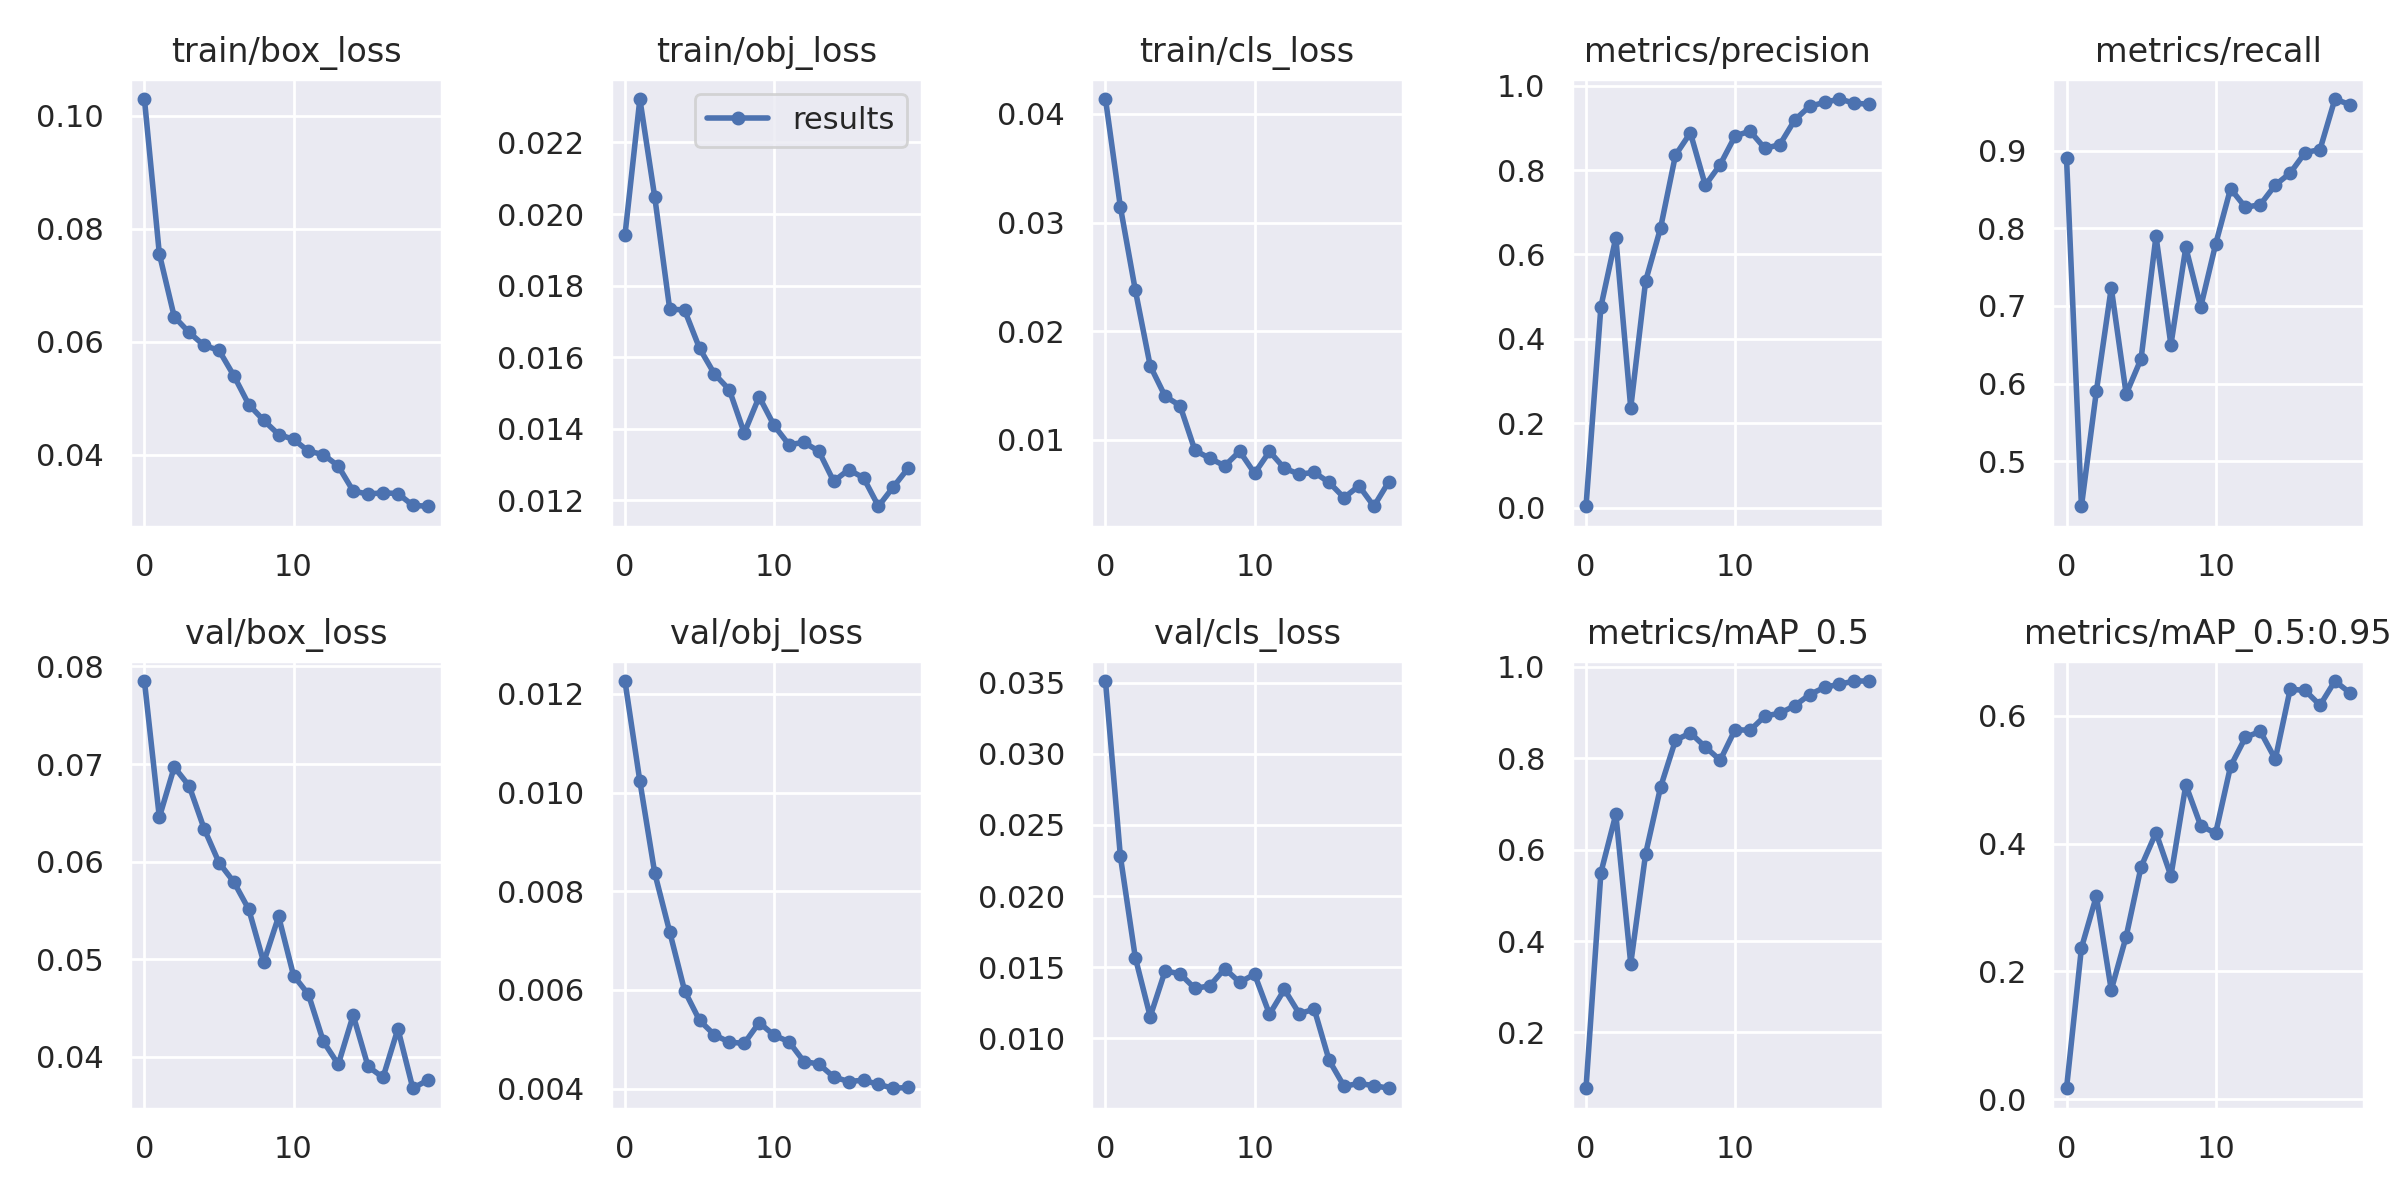

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/drive/MyDrive/yolov5/runs/train/yolov5s_results  --cache3/results.png', width=1000)